In [329]:
import os
import re
import cv2
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt
import glob
import tensorflow as tf


(103, 79, 3)


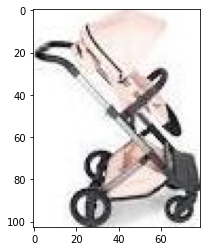

In [330]:
imgpath = r"C:\Users\USER\Downloads\186.jpg"

img = cv2.imread(imgpath)
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

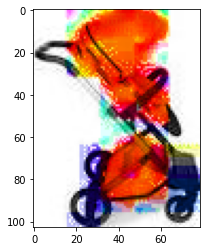

In [349]:
tf_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
tf_img = tf.image.adjust_saturation(tf_img, 30)


plt.imshow(tf_img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


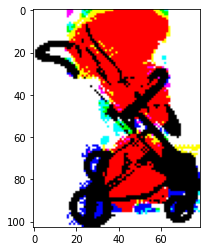

In [351]:
ret, thresh = cv2.threshold(np.float32(tf_img), 185, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap = 'gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


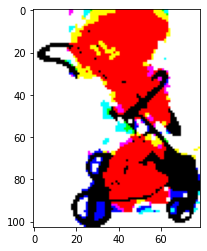

In [352]:
kernel = np.ones((2,2), np.uint8)
dilated = cv2.dilate(thresh, kernel, iterations=1)

plt.imshow(dilated, cmap=None)
plt.show()

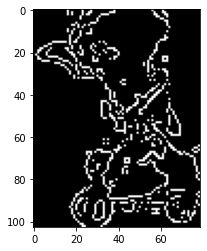

In [353]:
dilated = dilated.astype(np.uint8)
edges = cv2.Canny(dilated,20,30)
plt.imshow(edges, cmap='gray')

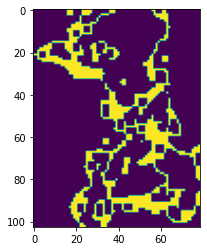

In [359]:
kernel = np.ones((3, 3), np.uint16)
closing = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

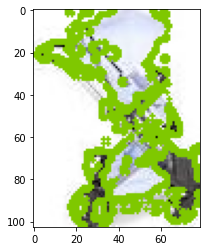

In [354]:
contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL , cv2.CHAIN_APPROX_NONE)
temp_copy = img.copy()

cv2.drawContours(temp_copy, contours, -1, (127,200,0),2)
plt.imshow(temp_copy)
plt.show()

In [360]:
cv2.grabCut

<function grabCut>

In [361]:
img_url = 'https://github.com/OPHoperHPO/image-background-remove-tool/raw/master/docs/imgs/input/4.jpg'  #@param {type: "string"}
preprocessing = "bbd-fastrcnn" #@param ["bbd-fastrcnn", "bbmd-maskrcnn", "None"] {allow-input: false}
model_name = "u2net" #@param ["u2net", "basnet", "u2netp", "mobile_net_model", "xception_model"] {allow-input: false}
postprocessing = "rtb-bnb" #@param ["rtb-bnb", "rtb-bnb2", "No"] {allow-input: false}
!wget -q -O ./1.jpg "$img_url"  > /dev/null

from IPython.display import display
from PIL import Image
import os


display(Image.open("./1.jpg"))
if os.path.exists("./1.jpg"):
  f = "1.jpg"
  !python main.py -i ./1.jpg -o ./2.png -m $model_name -prep $preprocessing -postp $postprocessing
  image = Image.open("./2.png")
  new = Image.new("RGB", image.size, (255, 255, 255))
  new.paste(image, (0,0), image)
  display(new)
  display(image)

The system cannot find the path specified.


FileNotFoundError: [Errno 2] No such file or directory: './1.jpg'